In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

training_set = "../data/adult_train.csv"
test_set = "../data/adult_test.csv"

training_data = pd.read_csv(training_set)
test_data = pd.read_csv(test_set)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Examine the dataset
- check training and test labels
- check training and test features
    - check dtypes, and seperate numerical and object features
    - for "object" features, check if there are such labels in test set, but not in training set

In [3]:
train_y = training_data["label"]
train_x = training_data.drop("label", axis = 1)
print("training labels:")
print(train_y.value_counts())
print("-"*50)

test_y = test_data["label"]
test_x = test_data.drop("label", axis = 1)
print("test labels:")
print(test_y.value_counts())

print(train_x.shape)
print(test_x.shape)

training labels:
 <=50K    24720
 >50K      7841
Name: label, dtype: int64
--------------------------------------------------
test labels:
 <=50K.    12435
 >50K.      3846
Name: label, dtype: int64
(32561, 14)
(16281, 14)


In [4]:
train_x.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [5]:
test_x.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States


In [6]:
print("training types:\n", train_x.dtypes)
print("-"*50)
print("test types:\n", test_x.dtypes)
print("-"*50)
print("difference:", set(train_x.dtypes.index) - set(test_x.dtypes.index))

training types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object
--------------------------------------------------
test types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object
--------------------------------------------------
difference: set()


# Encoding features and labels

- Cannot find an elegant approach (i.e., in no more than 2 lines) to use `sklearn.preprocessing.OneHotEncoder`, so I just use `pd.get_dummies` instead
- Scale all features to [0, 1] (in a featurewise approach)


In [7]:
train_index = train_x.index
test_index = test_x.index + train_x.index[-1]
print(train_index)
print(test_index)

x = pd.concat([train_x, test_x], axis = 0)
x = pd.get_dummies(x)

# scale to [0, 1]
x -= x.min()
x /= x.max()

train_X = x.iloc[train_index]
test_X = x.iloc[test_index]
print(train_X.shape)
print(test_X.shape)

train_Y = train_y.replace({" <=50K": 0, " >50K": 1})
test_Y = test_y.replace({" <=50K.": 0, " >50K.": 1})
print(train_Y.head(10))
print(test_Y.head(10))
train_X.head(10)

RangeIndex(start=0, stop=32561, step=1)
RangeIndex(start=32560, stop=48841, step=1)
(32561, 108)
(16281, 108)
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: label, dtype: int64
0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.044131,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048052,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.137581,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.150486,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.220635,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.273973,0.184219,0.866667,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.438356,0.100061,0.266667,0.000000,0.0,0.153061,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.479452,0.133519,0.533333,0.000000,0.0,0.448980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.191781,0.022661,0.866667,0.140841,0.0,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.342466,0.099562,0.800000,0.051781,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Fit Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# global seed
np.random.seed(1)

rfc = RandomForestClassifier()
rfc.fit(train_X.to_numpy(), train_Y.to_numpy())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

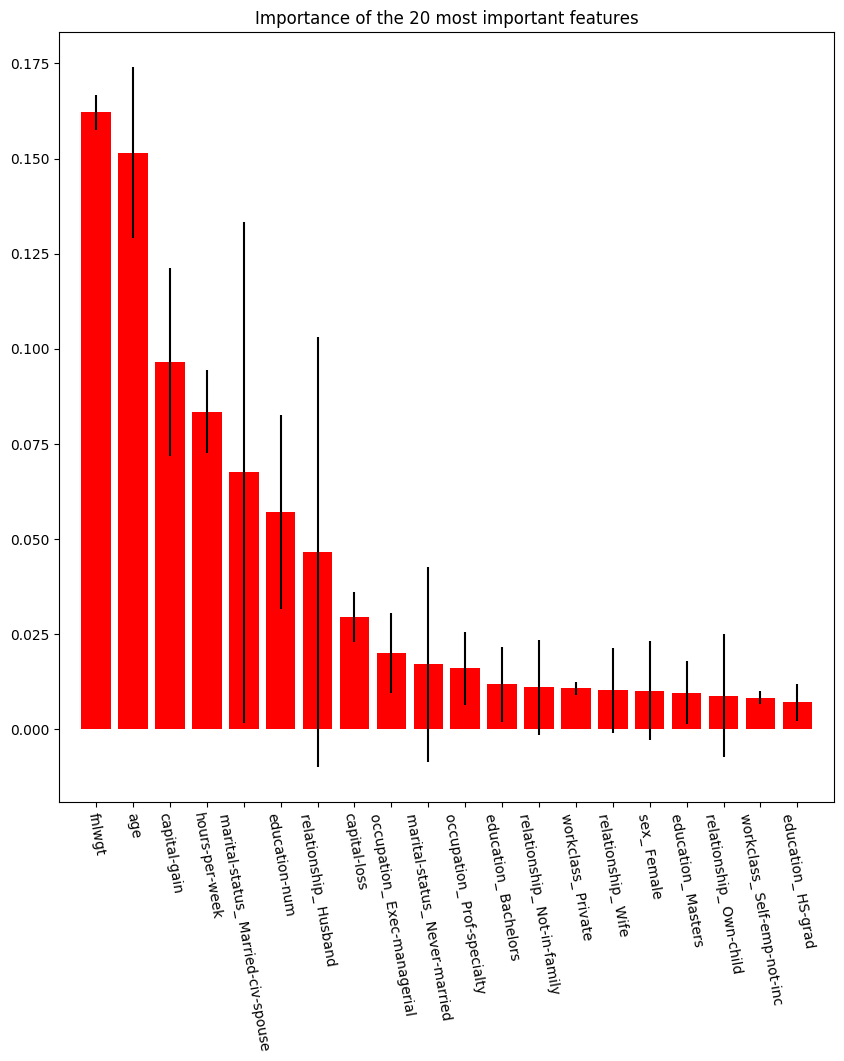

In [45]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis = 0)
indices = np.argsort(importances)[::-1][:20]

names = train_X.columns[indices]

plt.rcParams.update(plt.rcParamsDefault)
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.bar(np.arange(len(indices)), importances[indices], color = 'r', yerr = std[indices], align = "center")
plt.sca(ax)
plt.xticks(np.arange(len(indices)), names, rotation=-80, fontsize = 10)
ax.set_xlim([-1, len(indices)])
ax.set_title("Importance of the {0} most important features".format(len(indices)))
plt.show()

# Predict the output of RFC by logistic regression

In [63]:
y_train_RFC = rfc.predict(train_X.to_numpy())
y_test_RFC = rfc.predict(test_X.to_numpy())

from optimizer import Logistic_Regression

LR = Logistic_Regression()

w0 = np.zeros((train_X.shape[1]+1, 1))
num_iter = 10000
lr = 1e-2
solver = "GD"

w, hist = LR.fit(solver,
               train_X.to_numpy(), 
               y_train_RFC.reshape((-1, 1)), 
               w0, 
               num_iter = num_iter, 
               lr = lr, 
               test_X = test_X.to_numpy(), 
               test_y = test_Y.to_numpy().reshape((-1, 1)),
               debug = True)

Iteration: 0, training loss: 0.6931471805599453
Iteration: 1, training loss: 0.6897877565248203
Iteration: 2, training loss: 0.6865070405650309
Iteration: 3, training loss: 0.6833030129578818
Iteration: 4, training loss: 0.6801737007043541
Iteration: 5, training loss: 0.6771171769753086
Iteration: 6, training loss: 0.6741315605211428
Iteration: 7, training loss: 0.671215015048889
Iteration: 8, training loss: 0.6683657485705019
Iteration: 9, training loss: 0.6655820127258746
Iteration: 10, training loss: 0.6628621020839012
Iteration: 11, training loss: 0.6602043534246935
Iteration: 12, training loss: 0.6576071450058688
Iteration: 13, training loss: 0.655068895815613
Iteration: 14, training loss: 0.6525880648150573
Iteration: 15, training loss: 0.6501631501723099
Iteration: 16, training loss: 0.6477926884903229
Iteration: 17, training loss: 0.6454752540306067
Iteration: 18, training loss: 0.6432094579346492
Iteration: 19, training loss: 0.6409939474447496
Iteration: 20, training loss: 0.

Iteration: 172, training loss: 0.525247283823956
Iteration: 173, training loss: 0.5249686028749194
Iteration: 174, training loss: 0.5246915748385005
Iteration: 175, training loss: 0.5244161744304344
Iteration: 176, training loss: 0.5241423769142373
Iteration: 177, training loss: 0.523870158088063
Iteration: 178, training loss: 0.5235994942718946
Iteration: 179, training loss: 0.5233303622950636
Iteration: 180, training loss: 0.5230627394840871
Iteration: 181, training loss: 0.5227966036508139
Iteration: 182, training loss: 0.522531933080873
Iteration: 183, training loss: 0.5222687065224121
Iteration: 184, training loss: 0.5220069031751248
Iteration: 185, training loss: 0.5217465026795528
Iteration: 186, training loss: 0.5214874851066577
Iteration: 187, training loss: 0.521229830947657
Iteration: 188, training loss: 0.5209735211041148
Iteration: 189, training loss: 0.5207185368782808
Iteration: 190, training loss: 0.5204648599636724
Iteration: 191, training loss: 0.5202124724358919
Iter

Iteration: 339, training loss: 0.49168657153785356
Iteration: 340, training loss: 0.49153374779986597
Iteration: 341, training loss: 0.4913813142916353
Iteration: 342, training loss: 0.4912292693218324
Iteration: 343, training loss: 0.4910776112150165
Iteration: 344, training loss: 0.49092633831136173
Iteration: 345, training loss: 0.4907754489663894
Iteration: 346, training loss: 0.49062494155070546
Iteration: 347, training loss: 0.4904748144497443
Iteration: 348, training loss: 0.4903250660635167
Iteration: 349, training loss: 0.49017569480636425
Iteration: 350, training loss: 0.49002669910671826
Iteration: 351, training loss: 0.489878077406863
Iteration: 352, training loss: 0.4897298281627055
Iteration: 353, training loss: 0.48958194984354897
Iteration: 354, training loss: 0.48943444093187055
Iteration: 355, training loss: 0.4892872999231048
Iteration: 356, training loss: 0.4891405253254311
Iteration: 357, training loss: 0.488994115659565
Iteration: 358, training loss: 0.48884806945

Iteration: 513, training loss: 0.4698825337137523
Iteration: 514, training loss: 0.4697801105795663
Iteration: 515, training loss: 0.4696779032423929
Iteration: 516, training loss: 0.469575911061408
Iteration: 517, training loss: 0.46947413339816857
Iteration: 518, training loss: 0.46937256961659896
Iteration: 519, training loss: 0.4692712190829778
Iteration: 520, training loss: 0.4691700811659251
Iteration: 521, training loss: 0.46906915523638976
Iteration: 522, training loss: 0.46896844066763615
Iteration: 523, training loss: 0.4688679368352327
Iteration: 524, training loss: 0.4687676431170384
Iteration: 525, training loss: 0.4686675588931913
Iteration: 526, training loss: 0.468567683546096
Iteration: 527, training loss: 0.4684680164604123
Iteration: 528, training loss: 0.46836855702304225
Iteration: 529, training loss: 0.4682693046231196
Iteration: 530, training loss: 0.4681702586519974
Iteration: 531, training loss: 0.46807141850323664
Iteration: 532, training loss: 0.4679727835725

Iteration: 680, training loss: 0.45534433793074863
Iteration: 681, training loss: 0.4552705742007306
Iteration: 682, training loss: 0.455196945092245
Iteration: 683, training loss: 0.45512345024333273
Iteration: 684, training loss: 0.4550500892932095
Iteration: 685, training loss: 0.4549768618822625
Iteration: 686, training loss: 0.4549037676520455
Iteration: 687, training loss: 0.4548308062452746
Iteration: 688, training loss: 0.45475797730582446
Iteration: 689, training loss: 0.45468528047872336
Iteration: 690, training loss: 0.45461271541014986
Iteration: 691, training loss: 0.45454028174742794
Iteration: 692, training loss: 0.45446797913902304
Iteration: 693, training loss: 0.45439580723453776
Iteration: 694, training loss: 0.45432376568470834
Iteration: 695, training loss: 0.4542518541413997
Iteration: 696, training loss: 0.45418007225760176
Iteration: 697, training loss: 0.4541084196874254
Iteration: 698, training loss: 0.45403689608609843
Iteration: 699, training loss: 0.4539655

Iteration: 854, training loss: 0.44426182819728877
Iteration: 855, training loss: 0.4442069161331025
Iteration: 856, training loss: 0.44415209025372704
Iteration: 857, training loss: 0.4440973503496674
Iteration: 858, training loss: 0.4440426962120626
Iteration: 859, training loss: 0.44398812763268386
Iteration: 860, training loss: 0.44393364440393224
Iteration: 861, training loss: 0.44387924631883646
Iteration: 862, training loss: 0.44382493317105054
Iteration: 863, training loss: 0.4437707047548522
Iteration: 864, training loss: 0.4437165608651401
Iteration: 865, training loss: 0.4436625012974321
Iteration: 866, training loss: 0.4436085258478629
Iteration: 867, training loss: 0.4435546343131821
Iteration: 868, training loss: 0.44350082649075195
Iteration: 869, training loss: 0.44344710217854527
Iteration: 870, training loss: 0.4433934611751434
Iteration: 871, training loss: 0.44333990327973416
Iteration: 872, training loss: 0.44328642829210946
Iteration: 873, training loss: 0.4432330

Iteration: 1022, training loss: 0.43610121148516706
Iteration: 1023, training loss: 0.43605826966468864
Iteration: 1024, training loss: 0.4360153862641003
Iteration: 1025, training loss: 0.43597256115521293
Iteration: 1026, training loss: 0.43592979421019734
Iteration: 1027, training loss: 0.43588708530158365
Iteration: 1028, training loss: 0.4358444343022597
Iteration: 1029, training loss: 0.4358018410854702
Iteration: 1030, training loss: 0.4357593055248153
Iteration: 1031, training loss: 0.43571682749424967
Iteration: 1032, training loss: 0.4356744068680812
Iteration: 1033, training loss: 0.43563204352096985
Iteration: 1034, training loss: 0.43558973732792644
Iteration: 1035, training loss: 0.43554748816431177
Iteration: 1036, training loss: 0.4355052959058352
Iteration: 1037, training loss: 0.4354631604285536
Iteration: 1038, training loss: 0.4354210816088704
Iteration: 1039, training loss: 0.43537905932353416
Iteration: 1040, training loss: 0.43533709344963767
Iteration: 1041, tra

Iteration: 1189, training loss: 0.42965212835634214
Iteration: 1190, training loss: 0.429617407606022
Iteration: 1191, training loss: 0.42958272808226766
Iteration: 1192, training loss: 0.42954808970353275
Iteration: 1193, training loss: 0.4295134923884832
Iteration: 1194, training loss: 0.42947893605599596
Iteration: 1195, training loss: 0.4294444206251591
Iteration: 1196, training loss: 0.4294099460152706
Iteration: 1197, training loss: 0.4293755121458377
Iteration: 1198, training loss: 0.42934111893657667
Iteration: 1199, training loss: 0.4293067663074118
Iteration: 1200, training loss: 0.4292724541784751
Iteration: 1201, training loss: 0.42923818247010515
Iteration: 1202, training loss: 0.4292039511028471
Iteration: 1203, training loss: 0.4291697599974513
Iteration: 1204, training loss: 0.4291356090748736
Iteration: 1205, training loss: 0.4291014982562737
Iteration: 1206, training loss: 0.42906742746301535
Iteration: 1207, training loss: 0.4290333966166655
Iteration: 1208, training

Iteration: 1352, training loss: 0.42448465164198196
Iteration: 1353, training loss: 0.4244557077897869
Iteration: 1354, training loss: 0.4244267942670098
Iteration: 1355, training loss: 0.424397911019449
Iteration: 1356, training loss: 0.4243690579930335
Iteration: 1357, training loss: 0.42434023513382213
Iteration: 1358, training loss: 0.42431144238800356
Iteration: 1359, training loss: 0.42428267970189576
Iteration: 1360, training loss: 0.42425394702194547
Iteration: 1361, training loss: 0.4242252442947282
Iteration: 1362, training loss: 0.4241965714669475
Iteration: 1363, training loss: 0.4241679284854348
Iteration: 1364, training loss: 0.424139315297149
Iteration: 1365, training loss: 0.4241107318491759
Iteration: 1366, training loss: 0.4240821780887284
Iteration: 1367, training loss: 0.42405365396314537
Iteration: 1368, training loss: 0.42402515941989194
Iteration: 1369, training loss: 0.4239966944065588
Iteration: 1370, training loss: 0.4239682588708618
Iteration: 1371, training 

Iteration: 1515, training loss: 0.42013222265725486
Iteration: 1516, training loss: 0.42010758964713213
Iteration: 1517, training loss: 0.42008297961840363
Iteration: 1518, training loss: 0.42005839253392235
Iteration: 1519, training loss: 0.4200338283566243
Iteration: 1520, training loss: 0.42000928704952745
Iteration: 1521, training loss: 0.41998476857573247
Iteration: 1522, training loss: 0.4199602728984215
Iteration: 1523, training loss: 0.419935799980859
Iteration: 1524, training loss: 0.41991134978639055
Iteration: 1525, training loss: 0.4198869222784432
Iteration: 1526, training loss: 0.41986251742052516
Iteration: 1527, training loss: 0.4198381351762256
Iteration: 1528, training loss: 0.4198137755092141
Iteration: 1529, training loss: 0.41978943838324095
Iteration: 1530, training loss: 0.4197651237621365
Iteration: 1531, training loss: 0.4197408316098113
Iteration: 1532, training loss: 0.41971656189025547
Iteration: 1533, training loss: 0.4196923145675389
Iteration: 1534, train

Iteration: 1677, training loss: 0.4164176435537691
Iteration: 1678, training loss: 0.4163963009591944
Iteration: 1679, training loss: 0.4163749762678578
Iteration: 1680, training loss: 0.4163536694535091
Iteration: 1681, training loss: 0.4163323804899518
Iteration: 1682, training loss: 0.4163111093510435
Iteration: 1683, training loss: 0.4162898560106955
Iteration: 1684, training loss: 0.41626862044287277
Iteration: 1685, training loss: 0.41624740262159343
Iteration: 1686, training loss: 0.41622620252092946
Iteration: 1687, training loss: 0.41620502011500543
Iteration: 1688, training loss: 0.41618385537799946
Iteration: 1689, training loss: 0.4161627082841425
Iteration: 1690, training loss: 0.4161415788077178
Iteration: 1691, training loss: 0.41612046692306215
Iteration: 1692, training loss: 0.4160993726045641
Iteration: 1693, training loss: 0.41607829582666495
Iteration: 1694, training loss: 0.41605723656385823
Iteration: 1695, training loss: 0.4160361947906895
Iteration: 1696, traini

Iteration: 1839, training loss: 0.41317674365614115
Iteration: 1840, training loss: 0.4131579931509433
Iteration: 1841, training loss: 0.4131392569154062
Iteration: 1842, training loss: 0.41312053493048645
Iteration: 1843, training loss: 0.4131018271771771
Iteration: 1844, training loss: 0.4130831336365072
Iteration: 1845, training loss: 0.4130644542895418
Iteration: 1846, training loss: 0.413045789117382
Iteration: 1847, training loss: 0.41302713810116487
Iteration: 1848, training loss: 0.413008501222063
Iteration: 1849, training loss: 0.4129898784612848
Iteration: 1850, training loss: 0.4129712698000744
Iteration: 1851, training loss: 0.41295267521971146
Iteration: 1852, training loss: 0.412934094701511
Iteration: 1853, training loss: 0.4129155282268235
Iteration: 1854, training loss: 0.41289697577703455
Iteration: 1855, training loss: 0.4128784373335651
Iteration: 1856, training loss: 0.4128599128778712
Iteration: 1857, training loss: 0.41284140239144385
Iteration: 1858, training lo

Iteration: 1999, training loss: 0.41034630166649544
Iteration: 2000, training loss: 0.41032961425036996
Iteration: 2001, training loss: 0.4103129384655387
Iteration: 2002, training loss: 0.41029627429779714
Iteration: 2003, training loss: 0.4102796217329656
Iteration: 2004, training loss: 0.41026298075688933
Iteration: 2005, training loss: 0.4102463513554387
Iteration: 2006, training loss: 0.4102297335145088
Iteration: 2007, training loss: 0.41021312722001924
Iteration: 2008, training loss: 0.4101965324579148
Iteration: 2009, training loss: 0.41017994921416473
Iteration: 2010, training loss: 0.41016337747476256
Iteration: 2011, training loss: 0.41014681722572693
Iteration: 2012, training loss: 0.4101302684531006
Iteration: 2013, training loss: 0.4101137311429511
Iteration: 2014, training loss: 0.4100972052813699
Iteration: 2015, training loss: 0.41008069085447324
Iteration: 2016, training loss: 0.41006418784840143
Iteration: 2017, training loss: 0.410047696249319
Iteration: 2018, train

Iteration: 2167, training loss: 0.4076956992406882
Iteration: 2168, training loss: 0.4076807843733519
Iteration: 2169, training loss: 0.40766587906241825
Iteration: 2170, training loss: 0.407650983297198
Iteration: 2171, training loss: 0.4076360970670194
Iteration: 2172, training loss: 0.40762122036122767
Iteration: 2173, training loss: 0.4076063531691857
Iteration: 2174, training loss: 0.4075914954802733
Iteration: 2175, training loss: 0.40757664728388776
Iteration: 2176, training loss: 0.40756180856944335
Iteration: 2177, training loss: 0.40754697932637146
Iteration: 2178, training loss: 0.40753215954412075
Iteration: 2179, training loss: 0.4075173492121568
Iteration: 2180, training loss: 0.40750254831996247
Iteration: 2181, training loss: 0.40748775685703703
Iteration: 2182, training loss: 0.4074729748128973
Iteration: 2183, training loss: 0.4074582021770767
Iteration: 2184, training loss: 0.4074434389391257
Iteration: 2185, training loss: 0.4074286850886117
Iteration: 2186, trainin

Iteration: 2329, training loss: 0.4053971310364155
Iteration: 2330, training loss: 0.405383636042717
Iteration: 2331, training loss: 0.405370149077004
Iteration: 2332, training loss: 0.4053566701309799
Iteration: 2333, training loss: 0.40534319919636025
Iteration: 2334, training loss: 0.40532973626487323
Iteration: 2335, training loss: 0.40531628132825936
Iteration: 2336, training loss: 0.40530283437827147
Iteration: 2337, training loss: 0.40528939540667497
Iteration: 2338, training loss: 0.4052759644052475
Iteration: 2339, training loss: 0.40526254136577916
Iteration: 2340, training loss: 0.40524912628007187
Iteration: 2341, training loss: 0.40523571913994055
Iteration: 2342, training loss: 0.4052223199372119
Iteration: 2343, training loss: 0.405208928663725
Iteration: 2344, training loss: 0.4051955453113311
Iteration: 2345, training loss: 0.40518216987189354
Iteration: 2346, training loss: 0.40516880233728797
Iteration: 2347, training loss: 0.40515544269940224
Iteration: 2348, traini

Iteration: 2496, training loss: 0.40324878422084703
Iteration: 2497, training loss: 0.4032365236948339
Iteration: 2498, training loss: 0.40322426996706584
Iteration: 2499, training loss: 0.40321202303102827
Iteration: 2500, training loss: 0.4031997828802157
Iteration: 2501, training loss: 0.40318754950813157
Iteration: 2502, training loss: 0.40317532290828867
Iteration: 2503, training loss: 0.40316310307420844
Iteration: 2504, training loss: 0.4031508899994216
Iteration: 2505, training loss: 0.4031386836774677
Iteration: 2506, training loss: 0.40312648410189533
Iteration: 2507, training loss: 0.4031142912662619
Iteration: 2508, training loss: 0.4031021051641341
Iteration: 2509, training loss: 0.4030899257890871
Iteration: 2510, training loss: 0.4030777531347052
Iteration: 2511, training loss: 0.40306558719458174
Iteration: 2512, training loss: 0.40305342796231847
Iteration: 2513, training loss: 0.40304127543152646
Iteration: 2514, training loss: 0.40302912959582554
Iteration: 2515, tra

Iteration: 2656, training loss: 0.40136943497850036
Iteration: 2657, training loss: 0.4013581849706153
Iteration: 2658, training loss: 0.401346940823703
Iteration: 2659, training loss: 0.4013357025325098
Iteration: 2660, training loss: 0.40132447009178884
Iteration: 2661, training loss: 0.40131324349630026
Iteration: 2662, training loss: 0.4013020227408109
Iteration: 2663, training loss: 0.40129080782009435
Iteration: 2664, training loss: 0.40127959872893093
Iteration: 2665, training loss: 0.4012683954621078
Iteration: 2666, training loss: 0.40125719801441884
Iteration: 2667, training loss: 0.40124600638066454
Iteration: 2668, training loss: 0.4012348205556524
Iteration: 2669, training loss: 0.4012236405341963
Iteration: 2670, training loss: 0.40121246631111684
Iteration: 2671, training loss: 0.4012012978812416
Iteration: 2672, training loss: 0.40119013523940456
Iteration: 2673, training loss: 0.40117897838044647
Iteration: 2674, training loss: 0.4011678272992146
Iteration: 2675, train

Iteration: 2819, training loss: 0.39960952662894095
Iteration: 2820, training loss: 0.3995991671100813
Iteration: 2821, training loss: 0.3995888126780994
Iteration: 2822, training loss: 0.3995784633287126
Iteration: 2823, training loss: 0.3995681190576431
Iteration: 2824, training loss: 0.39955777986061863
Iteration: 2825, training loss: 0.39954744573337175
Iteration: 2826, training loss: 0.3995371166716406
Iteration: 2827, training loss: 0.39952679267116814
Iteration: 2828, training loss: 0.3995164737277025
Iteration: 2829, training loss: 0.399506159836997
Iteration: 2830, training loss: 0.3994958509948101
Iteration: 2831, training loss: 0.39948554719690543
Iteration: 2832, training loss: 0.3994752484390515
Iteration: 2833, training loss: 0.39946495471702226
Iteration: 2834, training loss: 0.3994546660265965
Iteration: 2835, training loss: 0.39944438236355817
Iteration: 2836, training loss: 0.39943410372369625
Iteration: 2837, training loss: 0.3994238301028047
Iteration: 2838, trainin

Iteration: 2980, training loss: 0.3980043724523195
Iteration: 2981, training loss: 0.3979947800829979
Iteration: 2982, training loss: 0.3979851921724604
Iteration: 2983, training loss: 0.3979756087171609
Iteration: 2984, training loss: 0.3979660297135573
Iteration: 2985, training loss: 0.3979564551581116
Iteration: 2986, training loss: 0.39794688504728964
Iteration: 2987, training loss: 0.3979373193775613
Iteration: 2988, training loss: 0.3979277581454006
Iteration: 2989, training loss: 0.39791820134728545
Iteration: 2990, training loss: 0.3979086489796977
Iteration: 2991, training loss: 0.3978991010391233
Iteration: 2992, training loss: 0.397889557522052
Iteration: 2993, training loss: 0.3978800184249777
Iteration: 2994, training loss: 0.3978704837443982
Iteration: 2995, training loss: 0.3978609534768153
Iteration: 2996, training loss: 0.39785142761873465
Iteration: 2997, training loss: 0.39784190616666587
Iteration: 2998, training loss: 0.39783238911712254
Iteration: 2999, training l

Iteration: 3149, training loss: 0.39644388226555616
Iteration: 3150, training loss: 0.3964349960801525
Iteration: 3151, training loss: 0.39642611380686565
Iteration: 3152, training loss: 0.39641723544275076
Iteration: 3153, training loss: 0.3964083609848666
Iteration: 3154, training loss: 0.3963994904302745
Iteration: 3155, training loss: 0.396390623776039
Iteration: 3156, training loss: 0.3963817610192281
Iteration: 3157, training loss: 0.39637290215691273
Iteration: 3158, training loss: 0.3963640471861669
Iteration: 3159, training loss: 0.39635519610406766
Iteration: 3160, training loss: 0.3963463489076953
Iteration: 3161, training loss: 0.3963375055941333
Iteration: 3162, training loss: 0.39632866616046797
Iteration: 3163, training loss: 0.3963198306037887
Iteration: 3164, training loss: 0.3963109989211885
Iteration: 3165, training loss: 0.39630217110976274
Iteration: 3166, training loss: 0.3962933471666103
Iteration: 3167, training loss: 0.39628452708883305
Iteration: 3168, trainin

Iteration: 3321, training loss: 0.3949706413874071
Iteration: 3322, training loss: 0.3949623872458902
Iteration: 3323, training loss: 0.3949541365526537
Iteration: 3324, training loss: 0.3949458893052325
Iteration: 3325, training loss: 0.3949376455011642
Iteration: 3326, training loss: 0.3949294051379889
Iteration: 3327, training loss: 0.39492116821324896
Iteration: 3328, training loss: 0.3949129347244893
Iteration: 3329, training loss: 0.3949047046692574
Iteration: 3330, training loss: 0.3948964780451031
Iteration: 3331, training loss: 0.3948882548495787
Iteration: 3332, training loss: 0.39488003508023883
Iteration: 3333, training loss: 0.394871818734641
Iteration: 3334, training loss: 0.39486360581034446
Iteration: 3335, training loss: 0.3948553963049117
Iteration: 3336, training loss: 0.3948471902159069
Iteration: 3337, training loss: 0.39483898754089725
Iteration: 3338, training loss: 0.394830788277452
Iteration: 3339, training loss: 0.39482259242314305
Iteration: 3340, training lo

Iteration: 3487, training loss: 0.39364590501248586
Iteration: 3488, training loss: 0.3936381912839624
Iteration: 3489, training loss: 0.39363048062609196
Iteration: 3490, training loss: 0.393622773036779
Iteration: 3491, training loss: 0.39361506851392963
Iteration: 3492, training loss: 0.39360736705545196
Iteration: 3493, training loss: 0.39359966865925633
Iteration: 3494, training loss: 0.3935919733232547
Iteration: 3495, training loss: 0.39358428104536125
Iteration: 3496, training loss: 0.39357659182349214
Iteration: 3497, training loss: 0.3935689056555654
Iteration: 3498, training loss: 0.3935612225395012
Iteration: 3499, training loss: 0.3935535424732214
Iteration: 3500, training loss: 0.3935458654546502
Iteration: 3501, training loss: 0.3935381914817133
Iteration: 3502, training loss: 0.3935305205523391
Iteration: 3503, training loss: 0.3935228526644572
Iteration: 3504, training loss: 0.39351518781599937
Iteration: 3505, training loss: 0.3935075260048998
Iteration: 3506, trainin

Iteration: 3650, training loss: 0.3924276784218387
Iteration: 3651, training loss: 0.3924204388837544
Iteration: 3652, training loss: 0.3924132020993582
Iteration: 3653, training loss: 0.39240596806684913
Iteration: 3654, training loss: 0.39239873678442716
Iteration: 3655, training loss: 0.39239150825029434
Iteration: 3656, training loss: 0.3923842824626543
Iteration: 3657, training loss: 0.3923770594197123
Iteration: 3658, training loss: 0.39236983911967493
Iteration: 3659, training loss: 0.39236262156075097
Iteration: 3660, training loss: 0.3923554067411502
Iteration: 3661, training loss: 0.39234819465908455
Iteration: 3662, training loss: 0.3923409853127673
Iteration: 3663, training loss: 0.3923337787004132
Iteration: 3664, training loss: 0.3923265748202391
Iteration: 3665, training loss: 0.3923193736704628
Iteration: 3666, training loss: 0.39231217524930434
Iteration: 3667, training loss: 0.392304979554985
Iteration: 3668, training loss: 0.3922977865857278
Iteration: 3669, training

Iteration: 3810, training loss: 0.3913032139140425
Iteration: 3811, training loss: 0.3912963930986343
Iteration: 3812, training loss: 0.391289574768249
Iteration: 3813, training loss: 0.3912827589213237
Iteration: 3814, training loss: 0.39127594555629686
Iteration: 3815, training loss: 0.39126913467160834
Iteration: 3816, training loss: 0.39126232626569946
Iteration: 3817, training loss: 0.3912555203370125
Iteration: 3818, training loss: 0.3912487168839914
Iteration: 3819, training loss: 0.39124191590508156
Iteration: 3820, training loss: 0.39123511739872935
Iteration: 3821, training loss: 0.3912283213633828
Iteration: 3822, training loss: 0.3912215277974912
Iteration: 3823, training loss: 0.39121473669950513
Iteration: 3824, training loss: 0.39120794806787657
Iteration: 3825, training loss: 0.39120116190105864
Iteration: 3826, training loss: 0.39119437819750624
Iteration: 3827, training loss: 0.3911875969556752
Iteration: 3828, training loss: 0.3911808181740227
Iteration: 3829, traini

Iteration: 3980, training loss: 0.3901781593180478
Iteration: 3981, training loss: 0.390171739547841
Iteration: 3982, training loss: 0.3901653220152912
Iteration: 3983, training loss: 0.3901589067190456
Iteration: 3984, training loss: 0.3901524936577528
Iteration: 3985, training loss: 0.39014608283006225
Iteration: 3986, training loss: 0.390139674234625
Iteration: 3987, training loss: 0.39013326787009284
Iteration: 3988, training loss: 0.39012686373511846
Iteration: 3989, training loss: 0.39012046182835636
Iteration: 3990, training loss: 0.3901140621484615
Iteration: 3991, training loss: 0.3901076646940904
Iteration: 3992, training loss: 0.3901012694639005
Iteration: 3993, training loss: 0.3900948764565502
Iteration: 3994, training loss: 0.3900884856706994
Iteration: 3995, training loss: 0.39008209710500874
Iteration: 3996, training loss: 0.3900757107581402
Iteration: 3997, training loss: 0.39006932662875676
Iteration: 3998, training loss: 0.3900629447155226
Iteration: 3999, training l

Iteration: 4145, training loss: 0.38914821075634876
Iteration: 4146, training loss: 0.38914214269115655
Iteration: 4147, training loss: 0.3891360766548195
Iteration: 4148, training loss: 0.38913001264615515
Iteration: 4149, training loss: 0.38912395066398253
Iteration: 4150, training loss: 0.3891178907071213
Iteration: 4151, training loss: 0.38911183277439193
Iteration: 4152, training loss: 0.38910577686461617
Iteration: 4153, training loss: 0.3890997229766165
Iteration: 4154, training loss: 0.3890936711092165
Iteration: 4155, training loss: 0.38908762126124047
Iteration: 4156, training loss: 0.3890815734315139
Iteration: 4157, training loss: 0.3890755276188629
Iteration: 4158, training loss: 0.38906948382211476
Iteration: 4159, training loss: 0.3890634420400978
Iteration: 4160, training loss: 0.3890574022716409
Iteration: 4161, training loss: 0.38905136451557437
Iteration: 4162, training loss: 0.3890453287707289
Iteration: 4163, training loss: 0.3890392950359365
Iteration: 4164, train

Iteration: 4306, training loss: 0.38819660163017305
Iteration: 4307, training loss: 0.38819084560500566
Iteration: 4308, training loss: 0.3881850914299214
Iteration: 4309, training loss: 0.38817933910387875
Iteration: 4310, training loss: 0.38817358862583695
Iteration: 4311, training loss: 0.3881678399947563
Iteration: 4312, training loss: 0.3881620932095975
Iteration: 4313, training loss: 0.3881563482693223
Iteration: 4314, training loss: 0.38815060517289335
Iteration: 4315, training loss: 0.3881448639192739
Iteration: 4316, training loss: 0.3881391245074281
Iteration: 4317, training loss: 0.3881333869363209
Iteration: 4318, training loss: 0.388127651204918
Iteration: 4319, training loss: 0.38812191731218576
Iteration: 4320, training loss: 0.38811618525709174
Iteration: 4321, training loss: 0.388110455038604
Iteration: 4322, training loss: 0.38810472665569146
Iteration: 4323, training loss: 0.3880990001073237
Iteration: 4324, training loss: 0.38809327539247135
Iteration: 4325, trainin

Iteration: 4470, training loss: 0.38727661268335684
Iteration: 4471, training loss: 0.38727114671034707
Iteration: 4472, training loss: 0.38726568242683534
Iteration: 4473, training loss: 0.3872602198319024
Iteration: 4474, training loss: 0.38725475892462957
Iteration: 4475, training loss: 0.38724929970409916
Iteration: 4476, training loss: 0.3872438421693935
Iteration: 4477, training loss: 0.3872383863195963
Iteration: 4478, training loss: 0.38723293215379156
Iteration: 4479, training loss: 0.38722747967106413
Iteration: 4480, training loss: 0.38722202887049934
Iteration: 4481, training loss: 0.38721657975118345
Iteration: 4482, training loss: 0.38721113231220333
Iteration: 4483, training loss: 0.3872056865526465
Iteration: 4484, training loss: 0.387200242471601
Iteration: 4485, training loss: 0.387194800068156
Iteration: 4486, training loss: 0.3871893593414008
Iteration: 4487, training loss: 0.38718392029042564
Iteration: 4488, training loss: 0.38717848291432166
Iteration: 4489, trai

Iteration: 4635, training loss: 0.386396930092897
Iteration: 4636, training loss: 0.3863917309355155
Iteration: 4637, training loss: 0.38638653332479234
Iteration: 4638, training loss: 0.38638133725991364
Iteration: 4639, training loss: 0.3863761427400656
Iteration: 4640, training loss: 0.38637094976443553
Iteration: 4641, training loss: 0.3863657583322111
Iteration: 4642, training loss: 0.38636056844258043
Iteration: 4643, training loss: 0.3863553800947324
Iteration: 4644, training loss: 0.3863501932878566
Iteration: 4645, training loss: 0.38634500802114263
Iteration: 4646, training loss: 0.38633982429378155
Iteration: 4647, training loss: 0.38633464210496427
Iteration: 4648, training loss: 0.3863294614538828
Iteration: 4649, training loss: 0.3863242823397292
Iteration: 4650, training loss: 0.38631910476169656
Iteration: 4651, training loss: 0.3863139287189785
Iteration: 4652, training loss: 0.386308754210769
Iteration: 4653, training loss: 0.3863035812362628
Iteration: 4654, training

Iteration: 4801, training loss: 0.38555445945797
Iteration: 4802, training loss: 0.38554950632278595
Iteration: 4803, training loss: 0.3855445546068177
Iteration: 4804, training loss: 0.385539604309342
Iteration: 4805, training loss: 0.3855346554296364
Iteration: 4806, training loss: 0.38552970796697894
Iteration: 4807, training loss: 0.3855247619206478
Iteration: 4808, training loss: 0.38551981728992235
Iteration: 4809, training loss: 0.3855148740740818
Iteration: 4810, training loss: 0.38550993227240626
Iteration: 4811, training loss: 0.38550499188417625
Iteration: 4812, training loss: 0.3855000529086726
Iteration: 4813, training loss: 0.38549511534517694
Iteration: 4814, training loss: 0.3854901791929713
Iteration: 4815, training loss: 0.38548524445133825
Iteration: 4816, training loss: 0.3854803111195607
Iteration: 4817, training loss: 0.3854753791969222
Iteration: 4818, training loss: 0.38547044868270686
Iteration: 4819, training loss: 0.38546551957619907
Iteration: 4820, training

Iteration: 4972, training loss: 0.3847275265996749
Iteration: 4973, training loss: 0.3847228060425368
Iteration: 4974, training loss: 0.38471808678801706
Iteration: 4975, training loss: 0.38471336883547347
Iteration: 4976, training loss: 0.3847086521842643
Iteration: 4977, training loss: 0.3847039368337483
Iteration: 4978, training loss: 0.3846992227832846
Iteration: 4979, training loss: 0.38469451003223276
Iteration: 4980, training loss: 0.38468979857995284
Iteration: 4981, training loss: 0.38468508842580507
Iteration: 4982, training loss: 0.3846803795691506
Iteration: 4983, training loss: 0.3846756720093506
Iteration: 4984, training loss: 0.38467096574576687
Iteration: 4985, training loss: 0.3846662607777616
Iteration: 4986, training loss: 0.3846615571046975
Iteration: 4987, training loss: 0.38465685472593747
Iteration: 4988, training loss: 0.3846521536408451
Iteration: 4989, training loss: 0.38464745384878446
Iteration: 4990, training loss: 0.38464275534911957
Iteration: 4991, train

Iteration: 5133, training loss: 0.3839838677725888
Iteration: 5134, training loss: 0.38397934895554753
Iteration: 5135, training loss: 0.3839748313431409
Iteration: 5136, training loss: 0.38397031493479283
Iteration: 5137, training loss: 0.38396579972992756
Iteration: 5138, training loss: 0.38396128572797
Iteration: 5139, training loss: 0.38395677292834496
Iteration: 5140, training loss: 0.38395226133047794
Iteration: 5141, training loss: 0.3839477509337949
Iteration: 5142, training loss: 0.38394324173772176
Iteration: 5143, training loss: 0.3839387337416855
Iteration: 5144, training loss: 0.38393422694511276
Iteration: 5145, training loss: 0.383929721347431
Iteration: 5146, training loss: 0.38392521694806797
Iteration: 5147, training loss: 0.3839207137464518
Iteration: 5148, training loss: 0.383916211742011
Iteration: 5149, training loss: 0.38391171093417437
Iteration: 5150, training loss: 0.3839072113223712
Iteration: 5151, training loss: 0.38390271290603106
Iteration: 5152, training

Iteration: 5302, training loss: 0.3832368456739928
Iteration: 5303, training loss: 0.38323252255493334
Iteration: 5304, training loss: 0.38322820054835094
Iteration: 5305, training loss: 0.3832238796537301
Iteration: 5306, training loss: 0.3832195598705557
Iteration: 5307, training loss: 0.3832152411983127
Iteration: 5308, training loss: 0.3832109236364866
Iteration: 5309, training loss: 0.38320660718456323
Iteration: 5310, training loss: 0.38320229184202864
Iteration: 5311, training loss: 0.38319797760836916
Iteration: 5312, training loss: 0.3831936644830717
Iteration: 5313, training loss: 0.3831893524656233
Iteration: 5314, training loss: 0.3831850415555113
Iteration: 5315, training loss: 0.3831807317522236
Iteration: 5316, training loss: 0.38317642305524835
Iteration: 5317, training loss: 0.38317211546407376
Iteration: 5318, training loss: 0.38316780897818875
Iteration: 5319, training loss: 0.3831635035970823
Iteration: 5320, training loss: 0.3831591993202439
Iteration: 5321, traini

Iteration: 5465, training loss: 0.38254650922189826
Iteration: 5466, training loss: 0.3825423608588306
Iteration: 5467, training loss: 0.3825382135284286
Iteration: 5468, training loss: 0.38253406723022776
Iteration: 5469, training loss: 0.38252992196376395
Iteration: 5470, training loss: 0.3825257777285733
Iteration: 5471, training loss: 0.382521634524192
Iteration: 5472, training loss: 0.3825174923501569
Iteration: 5473, training loss: 0.38251335120600494
Iteration: 5474, training loss: 0.3825092110912731
Iteration: 5475, training loss: 0.38250507200549927
Iteration: 5476, training loss: 0.38250093394822116
Iteration: 5477, training loss: 0.3824967969189769
Iteration: 5478, training loss: 0.3824926609173048
Iteration: 5479, training loss: 0.3824885259427438
Iteration: 5480, training loss: 0.3824843919948327
Iteration: 5481, training loss: 0.38248025907311095
Iteration: 5482, training loss: 0.38247612717711793
Iteration: 5483, training loss: 0.38247199630639367
Iteration: 5484, traini

Iteration: 5636, training loss: 0.38185177842580365
Iteration: 5637, training loss: 0.3818478001295304
Iteration: 5638, training loss: 0.3818438227905753
Iteration: 5639, training loss: 0.3818398464085208
Iteration: 5640, training loss: 0.3818358709829497
Iteration: 5641, training loss: 0.3818318965134449
Iteration: 5642, training loss: 0.38182792299958956
Iteration: 5643, training loss: 0.38182395044096745
Iteration: 5644, training loss: 0.3818199788371623
Iteration: 5645, training loss: 0.38181600818775785
Iteration: 5646, training loss: 0.38181203849233863
Iteration: 5647, training loss: 0.3818080697504891
Iteration: 5648, training loss: 0.3818041019617941
Iteration: 5649, training loss: 0.38180013512583855
Iteration: 5650, training loss: 0.381796169242208
Iteration: 5651, training loss: 0.38179220431048766
Iteration: 5652, training loss: 0.38178824033026354
Iteration: 5653, training loss: 0.3817842773011217
Iteration: 5654, training loss: 0.3817803152226484
Iteration: 5655, trainin

Iteration: 5801, training loss: 0.38120801259097636
Iteration: 5802, training loss: 0.38120418678637524
Iteration: 5803, training loss: 0.38120036187353873
Iteration: 5804, training loss: 0.3811965378520893
Iteration: 5805, training loss: 0.3811927147216493
Iteration: 5806, training loss: 0.38118889248184173
Iteration: 5807, training loss: 0.38118507113228944
Iteration: 5808, training loss: 0.38118125067261593
Iteration: 5809, training loss: 0.3811774311024443
Iteration: 5810, training loss: 0.3811736124213986
Iteration: 5811, training loss: 0.3811697946291026
Iteration: 5812, training loss: 0.3811659777251804
Iteration: 5813, training loss: 0.3811621617092565
Iteration: 5814, training loss: 0.3811583465809553
Iteration: 5815, training loss: 0.38115453233990193
Iteration: 5816, training loss: 0.3811507189857213
Iteration: 5817, training loss: 0.3811469065180385
Iteration: 5818, training loss: 0.3811430949364793
Iteration: 5819, training loss: 0.38113928424066934
Iteration: 5820, traini

Iteration: 5963, training loss: 0.3805996052034192
Iteration: 5964, training loss: 0.38059591909279483
Iteration: 5965, training loss: 0.3805922338155977
Iteration: 5966, training loss: 0.38058854937148456
Iteration: 5967, training loss: 0.38058486576011263
Iteration: 5968, training loss: 0.3805811829811393
Iteration: 5969, training loss: 0.38057750103422217
Iteration: 5970, training loss: 0.38057381991901884
Iteration: 5971, training loss: 0.38057013963518754
Iteration: 5972, training loss: 0.38056646018238616
Iteration: 5973, training loss: 0.3805627815602733
Iteration: 5974, training loss: 0.3805591037685073
Iteration: 5975, training loss: 0.3805554268067472
Iteration: 5976, training loss: 0.3805517506746518
Iteration: 5977, training loss: 0.3805480753718803
Iteration: 5978, training loss: 0.38054440089809194
Iteration: 5979, training loss: 0.3805407272529465
Iteration: 5980, training loss: 0.38053705443610375
Iteration: 5981, training loss: 0.3805333824472235
Iteration: 5982, train

Iteration: 6131, training loss: 0.37999176995182604
Iteration: 6132, training loss: 0.37998821919636266
Iteration: 6133, training loss: 0.37998466921940705
Iteration: 6134, training loss: 0.3799811200206481
Iteration: 6135, training loss: 0.37997757159977474
Iteration: 6136, training loss: 0.3799740239564762
Iteration: 6137, training loss: 0.37997047709044157
Iteration: 6138, training loss: 0.3799669310013606
Iteration: 6139, training loss: 0.3799633856889228
Iteration: 6140, training loss: 0.37995984115281806
Iteration: 6141, training loss: 0.3799562973927364
Iteration: 6142, training loss: 0.37995275440836795
Iteration: 6143, training loss: 0.37994921219940325
Iteration: 6144, training loss: 0.37994567076553276
Iteration: 6145, training loss: 0.3799421301064471
Iteration: 6146, training loss: 0.37993859022183735
Iteration: 6147, training loss: 0.37993505111139464
Iteration: 6148, training loss: 0.3799315127748099
Iteration: 6149, training loss: 0.37992797521177496
Iteration: 6150, tr

Iteration: 6302, training loss: 0.37939565753083443
Iteration: 6303, training loss: 0.37939223551815593
Iteration: 6304, training loss: 0.37938881423325377
Iteration: 6305, training loss: 0.37938539367584545
Iteration: 6306, training loss: 0.37938197384564853
Iteration: 6307, training loss: 0.3793785547423809
Iteration: 6308, training loss: 0.37937513636576037
Iteration: 6309, training loss: 0.379371718715505
Iteration: 6310, training loss: 0.37936830179133313
Iteration: 6311, training loss: 0.37936488559296316
Iteration: 6312, training loss: 0.3793614701201136
Iteration: 6313, training loss: 0.37935805537250317
Iteration: 6314, training loss: 0.37935464134985075
Iteration: 6315, training loss: 0.3793512280518754
Iteration: 6316, training loss: 0.37934781547829616
Iteration: 6317, training loss: 0.37934440362883265
Iteration: 6318, training loss: 0.37934099250320413
Iteration: 6319, training loss: 0.3793375821011303
Iteration: 6320, training loss: 0.379334172422331
Iteration: 6321, tra

Iteration: 6463, training loss: 0.3788538985348034
Iteration: 6464, training loss: 0.37885059015971634
Iteration: 6465, training loss: 0.37884728246887434
Iteration: 6466, training loss: 0.3788439754620189
Iteration: 6467, training loss: 0.37884066913889164
Iteration: 6468, training loss: 0.37883736349923447
Iteration: 6469, training loss: 0.3788340585427891
Iteration: 6470, training loss: 0.37883075426929763
Iteration: 6471, training loss: 0.37882745067850226
Iteration: 6472, training loss: 0.37882414777014534
Iteration: 6473, training loss: 0.3788208455439693
Iteration: 6474, training loss: 0.3788175439997168
Iteration: 6475, training loss: 0.3788142431371306
Iteration: 6476, training loss: 0.3788109429559534
Iteration: 6477, training loss: 0.37880764345592843
Iteration: 6478, training loss: 0.3788043446367988
Iteration: 6479, training loss: 0.3788010464983079
Iteration: 6480, training loss: 0.37879774904019897
Iteration: 6481, training loss: 0.37879445226221575
Iteration: 6482, trai

Iteration: 6625, training loss: 0.3783266890225085
Iteration: 6626, training loss: 0.37832348821926176
Iteration: 6627, training loss: 0.3783202880601538
Iteration: 6628, training loss: 0.3783170885449478
Iteration: 6629, training loss: 0.37831388967340684
Iteration: 6630, training loss: 0.37831069144529444
Iteration: 6631, training loss: 0.3783074938603741
Iteration: 6632, training loss: 0.3783042969184094
Iteration: 6633, training loss: 0.3783011006191639
Iteration: 6634, training loss: 0.37829790496240173
Iteration: 6635, training loss: 0.3782947099478869
Iteration: 6636, training loss: 0.37829151557538326
Iteration: 6637, training loss: 0.3782883218446554
Iteration: 6638, training loss: 0.3782851287554674
Iteration: 6639, training loss: 0.3782819363075838
Iteration: 6640, training loss: 0.37827874450076937
Iteration: 6641, training loss: 0.37827555333478874
Iteration: 6642, training loss: 0.3782723628094069
Iteration: 6643, training loss: 0.3782691729243887
Iteration: 6644, trainin

Iteration: 6798, training loss: 0.3777823371157301
Iteration: 6799, training loss: 0.3777792443281702
Iteration: 6800, training loss: 0.3777761521455761
Iteration: 6801, training loss: 0.3777730605677317
Iteration: 6802, training loss: 0.3777699695944207
Iteration: 6803, training loss: 0.3777668792254272
Iteration: 6804, training loss: 0.3777637894605352
Iteration: 6805, training loss: 0.37776070029952885
Iteration: 6806, training loss: 0.3777576117421925
Iteration: 6807, training loss: 0.3777545237883107
Iteration: 6808, training loss: 0.3777514364376678
Iteration: 6809, training loss: 0.3777483496900485
Iteration: 6810, training loss: 0.37774526354523746
Iteration: 6811, training loss: 0.37774217800301974
Iteration: 6812, training loss: 0.3777390930631802
Iteration: 6813, training loss: 0.3777360087255039
Iteration: 6814, training loss: 0.37773292498977606
Iteration: 6815, training loss: 0.37772984185578207
Iteration: 6816, training loss: 0.37772675932330724
Iteration: 6817, training

Iteration: 6967, training loss: 0.377268076826822
Iteration: 6968, training loss: 0.37726508329499764
Iteration: 6969, training loss: 0.37726209033313113
Iteration: 6970, training loss: 0.37725909794102436
Iteration: 6971, training loss: 0.37725610611847904
Iteration: 6972, training loss: 0.3772531148652973
Iteration: 6973, training loss: 0.3772501241812809
Iteration: 6974, training loss: 0.3772471340662323
Iteration: 6975, training loss: 0.3772441445199534
Iteration: 6976, training loss: 0.3772411555422468
Iteration: 6977, training loss: 0.37723816713291486
Iteration: 6978, training loss: 0.37723517929176004
Iteration: 6979, training loss: 0.37723219201858504
Iteration: 6980, training loss: 0.3772292053131926
Iteration: 6981, training loss: 0.3772262191753857
Iteration: 6982, training loss: 0.377223233604967
Iteration: 6983, training loss: 0.3772202486017397
Iteration: 6984, training loss: 0.3772172641655071
Iteration: 6985, training loss: 0.3772142802960721
Iteration: 6986, training 

Iteration: 7129, training loss: 0.37679042232404847
Iteration: 7130, training loss: 0.37678751860811593
Iteration: 7131, training loss: 0.3767846154312915
Iteration: 7132, training loss: 0.3767817127933923
Iteration: 7133, training loss: 0.37677881069423574
Iteration: 7134, training loss: 0.37677590913363923
Iteration: 7135, training loss: 0.3767730081114202
Iteration: 7136, training loss: 0.37677010762739643
Iteration: 7137, training loss: 0.37676720768138533
Iteration: 7138, training loss: 0.37676430827320484
Iteration: 7139, training loss: 0.37676140940267283
Iteration: 7140, training loss: 0.37675851106960717
Iteration: 7141, training loss: 0.37675561327382595
Iteration: 7142, training loss: 0.37675271601514726
Iteration: 7143, training loss: 0.3767498192933893
Iteration: 7144, training loss: 0.3767469231083705
Iteration: 7145, training loss: 0.37674402745990926
Iteration: 7146, training loss: 0.3767411323478239
Iteration: 7147, training loss: 0.3767382377719331
Iteration: 7148, tr

Iteration: 7300, training loss: 0.37630157623495214
Iteration: 7301, training loss: 0.3762987621222389
Iteration: 7302, training loss: 0.3762959485186522
Iteration: 7303, training loss: 0.37629313542402415
Iteration: 7304, training loss: 0.37629032283818664
Iteration: 7305, training loss: 0.3762875107609718
Iteration: 7306, training loss: 0.3762846991922117
Iteration: 7307, training loss: 0.3762818881317388
Iteration: 7308, training loss: 0.3762790775793853
Iteration: 7309, training loss: 0.3762762675349836
Iteration: 7310, training loss: 0.37627345799836637
Iteration: 7311, training loss: 0.3762706489693661
Iteration: 7312, training loss: 0.37626784044781536
Iteration: 7313, training loss: 0.37626503243354703
Iteration: 7314, training loss: 0.37626222492639383
Iteration: 7315, training loss: 0.3762594179261888
Iteration: 7316, training loss: 0.37625661143276473
Iteration: 7317, training loss: 0.3762538054459549
Iteration: 7318, training loss: 0.37625099996559236
Iteration: 7319, train

Iteration: 7462, training loss: 0.37585221481005243
Iteration: 7463, training loss: 0.3758494810393657
Iteration: 7464, training loss: 0.3758467477516066
Iteration: 7465, training loss: 0.37584401494661945
Iteration: 7466, training loss: 0.3758412826242489
Iteration: 7467, training loss: 0.37583855078433953
Iteration: 7468, training loss: 0.37583581942673616
Iteration: 7469, training loss: 0.37583308855128345
Iteration: 7470, training loss: 0.37583035815782634
Iteration: 7471, training loss: 0.3758276282462097
Iteration: 7472, training loss: 0.3758248988162786
Iteration: 7473, training loss: 0.375822169867878
Iteration: 7474, training loss: 0.3758194414008532
Iteration: 7475, training loss: 0.37581671341504924
Iteration: 7476, training loss: 0.3758139859103117
Iteration: 7477, training loss: 0.37581125888648564
Iteration: 7478, training loss: 0.3758085323434167
Iteration: 7479, training loss: 0.3758058062809502
Iteration: 7480, training loss: 0.375803080698932
Iteration: 7481, training

Iteration: 7630, training loss: 0.3753995974436862
Iteration: 7631, training loss: 0.3753969426790761
Iteration: 7632, training loss: 0.3753942883722668
Iteration: 7633, training loss: 0.3753916345231148
Iteration: 7634, training loss: 0.37538898113147634
Iteration: 7635, training loss: 0.37538632819720774
Iteration: 7636, training loss: 0.37538367572016546
Iteration: 7637, training loss: 0.3753810237002061
Iteration: 7638, training loss: 0.3753783721371862
Iteration: 7639, training loss: 0.37537572103096245
Iteration: 7640, training loss: 0.3753730703813914
Iteration: 7641, training loss: 0.3753704201883301
Iteration: 7642, training loss: 0.37536777045163516
Iteration: 7643, training loss: 0.3753651211711638
Iteration: 7644, training loss: 0.3753624723467726
Iteration: 7645, training loss: 0.3753598239783189
Iteration: 7646, training loss: 0.3753571760656597
Iteration: 7647, training loss: 0.37535452860865226
Iteration: 7648, training loss: 0.37535188160715394
Iteration: 7649, trainin

Iteration: 7793, training loss: 0.37497281515596215
Iteration: 7794, training loss: 0.37497023316106676
Iteration: 7795, training loss: 0.37496765160139256
Iteration: 7796, training loss: 0.37496507047680616
Iteration: 7797, training loss: 0.3749624897871744
Iteration: 7798, training loss: 0.37495990953236363
Iteration: 7799, training loss: 0.374957329712241
Iteration: 7800, training loss: 0.3749547503266731
Iteration: 7801, training loss: 0.3749521713755269
Iteration: 7802, training loss: 0.37494959285866925
Iteration: 7803, training loss: 0.3749470147759673
Iteration: 7804, training loss: 0.37494443712728803
Iteration: 7805, training loss: 0.3749418599124987
Iteration: 7806, training loss: 0.3749392831314663
Iteration: 7807, training loss: 0.37493670678405816
Iteration: 7808, training loss: 0.37493413087014177
Iteration: 7809, training loss: 0.3749315553895843
Iteration: 7810, training loss: 0.3749289803422532
Iteration: 7811, training loss: 0.374926405728016
Iteration: 7812, trainin

Iteration: 7962, training loss: 0.3745425329340989
Iteration: 7963, training loss: 0.374540022644253
Iteration: 7964, training loss: 0.3745375127679114
Iteration: 7965, training loss: 0.3745350033049506
Iteration: 7966, training loss: 0.3745324942552467
Iteration: 7967, training loss: 0.37452998561867623
Iteration: 7968, training loss: 0.37452747739511577
Iteration: 7969, training loss: 0.3745249695844417
Iteration: 7970, training loss: 0.3745224621865305
Iteration: 7971, training loss: 0.3745199552012591
Iteration: 7972, training loss: 0.3745174486285039
Iteration: 7973, training loss: 0.3745149424681418
Iteration: 7974, training loss: 0.3745124367200496
Iteration: 7975, training loss: 0.37450993138410404
Iteration: 7976, training loss: 0.37450742646018204
Iteration: 7977, training loss: 0.3745049219481607
Iteration: 7978, training loss: 0.3745024178479169
Iteration: 7979, training loss: 0.3744999141593277
Iteration: 7980, training loss: 0.3744974108822703
Iteration: 7981, training lo

Iteration: 8134, training loss: 0.3741167428829989
Iteration: 8135, training loss: 0.3741143019413008
Iteration: 8136, training loss: 0.37411186139260993
Iteration: 8137, training loss: 0.3741094212368113
Iteration: 8138, training loss: 0.37410698147379023
Iteration: 8139, training loss: 0.3741045421034323
Iteration: 8140, training loss: 0.37410210312562275
Iteration: 8141, training loss: 0.374099664540247
Iteration: 8142, training loss: 0.37409722634719067
Iteration: 8143, training loss: 0.37409478854633926
Iteration: 8144, training loss: 0.3740923511375784
Iteration: 8145, training loss: 0.37408991412079373
Iteration: 8146, training loss: 0.37408747749587096
Iteration: 8147, training loss: 0.37408504126269587
Iteration: 8148, training loss: 0.3740826054211542
Iteration: 8149, training loss: 0.37408016997113175
Iteration: 8150, training loss: 0.37407773491251456
Iteration: 8151, training loss: 0.3740753002451886
Iteration: 8152, training loss: 0.3740728659690398
Iteration: 8153, train

Iteration: 8304, training loss: 0.3737073376730069
Iteration: 8305, training loss: 0.37370496193320923
Iteration: 8306, training loss: 0.3737025865676027
Iteration: 8307, training loss: 0.37370021157608035
Iteration: 8308, training loss: 0.3736978369585358
Iteration: 8309, training loss: 0.37369546271486237
Iteration: 8310, training loss: 0.37369308884495345
Iteration: 8311, training loss: 0.3736907153487023
Iteration: 8312, training loss: 0.37368834222600283
Iteration: 8313, training loss: 0.3736859694767483
Iteration: 8314, training loss: 0.37368359710083254
Iteration: 8315, training loss: 0.3736812250981491
Iteration: 8316, training loss: 0.37367885346859164
Iteration: 8317, training loss: 0.3736764822120539
Iteration: 8318, training loss: 0.37367411132842976
Iteration: 8319, training loss: 0.37367174081761295
Iteration: 8320, training loss: 0.3736693706794974
Iteration: 8321, training loss: 0.3736670009139771
Iteration: 8322, training loss: 0.37366463152094587
Iteration: 8323, trai

Iteration: 8476, training loss: 0.3733041259151381
Iteration: 8477, training loss: 0.3733018130036397
Iteration: 8478, training loss: 0.37329950044862087
Iteration: 8479, training loss: 0.373297188249982
Iteration: 8480, training loss: 0.3732948764076241
Iteration: 8481, training loss: 0.37329256492144774
Iteration: 8482, training loss: 0.3732902537913538
Iteration: 8483, training loss: 0.37328794301724316
Iteration: 8484, training loss: 0.3732856325990166
Iteration: 8485, training loss: 0.37328332253657515
Iteration: 8486, training loss: 0.3732810128298197
Iteration: 8487, training loss: 0.3732787034786513
Iteration: 8488, training loss: 0.37327639448297106
Iteration: 8489, training loss: 0.37327408584268007
Iteration: 8490, training loss: 0.37327177755767926
Iteration: 8491, training loss: 0.37326946962787
Iteration: 8492, training loss: 0.37326716205315347
Iteration: 8493, training loss: 0.3732648548334309
Iteration: 8494, training loss: 0.37326254796860364
Iteration: 8495, training

Iteration: 8639, training loss: 0.3729317587077005
Iteration: 8640, training loss: 0.372929502619466
Iteration: 8641, training loss: 0.37292724687204754
Iteration: 8642, training loss: 0.37292499146535224
Iteration: 8643, training loss: 0.3729227363992872
Iteration: 8644, training loss: 0.3729204816737594
Iteration: 8645, training loss: 0.37291822728867624
Iteration: 8646, training loss: 0.3729159732439449
Iteration: 8647, training loss: 0.37291371953947255
Iteration: 8648, training loss: 0.3729114661751665
Iteration: 8649, training loss: 0.3729092131509343
Iteration: 8650, training loss: 0.37290696046668304
Iteration: 8651, training loss: 0.37290470812232024
Iteration: 8652, training loss: 0.37290245611775347
Iteration: 8653, training loss: 0.37290020445288996
Iteration: 8654, training loss: 0.37289795312763746
Iteration: 8655, training loss: 0.3728957021419033
Iteration: 8656, training loss: 0.37289345149559533
Iteration: 8657, training loss: 0.3728912011886211
Iteration: 8658, train

Iteration: 8804, training loss: 0.372564048174343
Iteration: 8805, training loss: 0.3725618470904366
Iteration: 8806, training loss: 0.37255964633250616
Iteration: 8807, training loss: 0.3725574459004648
Iteration: 8808, training loss: 0.37255524579422555
Iteration: 8809, training loss: 0.3725530460137015
Iteration: 8810, training loss: 0.37255084655880566
Iteration: 8811, training loss: 0.3725486474294512
Iteration: 8812, training loss: 0.37254644862555136
Iteration: 8813, training loss: 0.37254425014701936
Iteration: 8814, training loss: 0.3725420519937683
Iteration: 8815, training loss: 0.3725398541657115
Iteration: 8816, training loss: 0.37253765666276234
Iteration: 8817, training loss: 0.37253545948483413
Iteration: 8818, training loss: 0.37253326263184017
Iteration: 8819, training loss: 0.37253106610369396
Iteration: 8820, training loss: 0.37252886990030887
Iteration: 8821, training loss: 0.3725266740215985
Iteration: 8822, training loss: 0.37252447846747616
Iteration: 8823, trai

Iteration: 8977, training loss: 0.3721880379649955
Iteration: 8978, training loss: 0.37218589200902297
Iteration: 8979, training loss: 0.37218374636447116
Iteration: 8980, training loss: 0.37218160103125897
Iteration: 8981, training loss: 0.37217945600930497
Iteration: 8982, training loss: 0.37217731129852794
Iteration: 8983, training loss: 0.37217516689884667
Iteration: 8984, training loss: 0.37217302281017994
Iteration: 8985, training loss: 0.37217087903244667
Iteration: 8986, training loss: 0.3721687355655656
Iteration: 8987, training loss: 0.37216659240945577
Iteration: 8988, training loss: 0.372164449564036
Iteration: 8989, training loss: 0.3721623070292253
Iteration: 8990, training loss: 0.37216016480494263
Iteration: 8991, training loss: 0.372158022891107
Iteration: 8992, training loss: 0.37215588128763766
Iteration: 8993, training loss: 0.37215373999445345
Iteration: 8994, training loss: 0.37215159901147354
Iteration: 8995, training loss: 0.3721494583386171
Iteration: 8996, tra

Iteration: 9146, training loss: 0.37182972908659734
Iteration: 9147, training loss: 0.3718276346306354
Iteration: 9148, training loss: 0.37182554047278454
Iteration: 9149, training loss: 0.3718234466129686
Iteration: 9150, training loss: 0.37182135305111147
Iteration: 9151, training loss: 0.3718192597871369
Iteration: 9152, training loss: 0.3718171668209688
Iteration: 9153, training loss: 0.371815074152531
Iteration: 9154, training loss: 0.3718129817817474
Iteration: 9155, training loss: 0.3718108897085418
Iteration: 9156, training loss: 0.37180879793283844
Iteration: 9157, training loss: 0.37180670645456126
Iteration: 9158, training loss: 0.37180461527363406
Iteration: 9159, training loss: 0.3718025243899811
Iteration: 9160, training loss: 0.3718004338035265
Iteration: 9161, training loss: 0.37179834351419416
Iteration: 9162, training loss: 0.37179625352190837
Iteration: 9163, training loss: 0.3717941638265933
Iteration: 9164, training loss: 0.371792074428173
Iteration: 9165, training

Iteration: 9315, training loss: 0.3714799387001909
Iteration: 9316, training loss: 0.3714778935650786
Iteration: 9317, training loss: 0.3714758487155915
Iteration: 9318, training loss: 0.3714738041516579
Iteration: 9319, training loss: 0.37147175987320635
Iteration: 9320, training loss: 0.37146971588016525
Iteration: 9321, training loss: 0.371467672172463
Iteration: 9322, training loss: 0.3714656287500285
Iteration: 9323, training loss: 0.37146358561278997
Iteration: 9324, training loss: 0.3714615427606761
Iteration: 9325, training loss: 0.3714595001936157
Iteration: 9326, training loss: 0.37145745791153706
Iteration: 9327, training loss: 0.37145541591436915
Iteration: 9328, training loss: 0.3714533742020405
Iteration: 9329, training loss: 0.37145133277447995
Iteration: 9330, training loss: 0.37144929163161605
Iteration: 9331, training loss: 0.37144725077337776
Iteration: 9332, training loss: 0.37144521019969384
Iteration: 9333, training loss: 0.37144316991049314
Iteration: 9334, train

Iteration: 9480, training loss: 0.3711463040784074
Iteration: 9481, training loss: 0.37114430512220004
Iteration: 9482, training loss: 0.3711423064401577
Iteration: 9483, training loss: 0.37114030803221315
Iteration: 9484, training loss: 0.371138309898299
Iteration: 9485, training loss: 0.3711363120383479
Iteration: 9486, training loss: 0.37113431445229256
Iteration: 9487, training loss: 0.3711323171400658
Iteration: 9488, training loss: 0.37113032010160013
Iteration: 9489, training loss: 0.37112832333682855
Iteration: 9490, training loss: 0.37112632684568375
Iteration: 9491, training loss: 0.37112433062809863
Iteration: 9492, training loss: 0.371122334684006
Iteration: 9493, training loss: 0.37112033901333863
Iteration: 9494, training loss: 0.37111834361602963
Iteration: 9495, training loss: 0.3711163484920117
Iteration: 9496, training loss: 0.3711143536412179
Iteration: 9497, training loss: 0.37111235906358125
Iteration: 9498, training loss: 0.37111036475903464
Iteration: 9499, train

Iteration: 9652, training loss: 0.3708064601839799
Iteration: 9653, training loss: 0.37080450741331733
Iteration: 9654, training loss: 0.37080255490558106
Iteration: 9655, training loss: 0.37080060266070763
Iteration: 9656, training loss: 0.37079865067863393
Iteration: 9657, training loss: 0.37079669895929646
Iteration: 9658, training loss: 0.370794747502632
Iteration: 9659, training loss: 0.37079279630857737
Iteration: 9660, training loss: 0.37079084537706924
Iteration: 9661, training loss: 0.3707888947080445
Iteration: 9662, training loss: 0.37078694430143994
Iteration: 9663, training loss: 0.3707849941571922
Iteration: 9664, training loss: 0.3707830442752385
Iteration: 9665, training loss: 0.3707810946555154
Iteration: 9666, training loss: 0.3707791452979599
Iteration: 9667, training loss: 0.37077719620250904
Iteration: 9668, training loss: 0.37077524736909956
Iteration: 9669, training loss: 0.37077329879766874
Iteration: 9670, training loss: 0.3707713504881532
Iteration: 9671, trai

Iteration: 9817, training loss: 0.37048776450998
Iteration: 9818, training loss: 0.37048585428131375
Iteration: 9819, training loss: 0.37048394430541837
Iteration: 9820, training loss: 0.37048203458223405
Iteration: 9821, training loss: 0.370480125111701
Iteration: 9822, training loss: 0.3704782158937595
Iteration: 9823, training loss: 0.3704763069283499
Iteration: 9824, training loss: 0.37047439821541234
Iteration: 9825, training loss: 0.3704724897548874
Iteration: 9826, training loss: 0.37047058154671514
Iteration: 9827, training loss: 0.3704686735908362
Iteration: 9828, training loss: 0.3704667658871908
Iteration: 9829, training loss: 0.3704648584357193
Iteration: 9830, training loss: 0.3704629512363623
Iteration: 9831, training loss: 0.37046104428906024
Iteration: 9832, training loss: 0.37045913759375343
Iteration: 9833, training loss: 0.3704572311503824
Iteration: 9834, training loss: 0.37045532495888794
Iteration: 9835, training loss: 0.37045341901921014
Iteration: 9836, training

Iteration: 9990, training loss: 0.37016100571863425
Iteration: 9991, training loss: 0.370159138347236
Iteration: 9992, training loss: 0.37015727121856834
Iteration: 9993, training loss: 0.3701554043325749
Iteration: 9994, training loss: 0.37015353768919923
Iteration: 9995, training loss: 0.3701516712883852
Iteration: 9996, training loss: 0.37014980513007656
Iteration: 9997, training loss: 0.37014793921421696
Iteration: 9998, training loss: 0.37014607354075024
Iteration: 9999, training loss: 0.37014420810962023


In [60]:
w_features = pd.Series(w[1:].flatten(), index = train_X.columns)
w_features.sort_values()

marital-status_ Never-married        -1.019990
relationship_ Own-child              -0.800609
sex_ Female                          -0.664707
occupation_ Other-service            -0.641157
education_ HS-grad                   -0.557572
                                        ...   
education_ Masters                    0.526404
relationship_ Wife                    0.549355
occupation_ Prof-specialty            0.603843
occupation_ Exec-managerial           0.751968
marital-status_ Married-civ-spouse    0.772295
Length: 108, dtype: float64

In [61]:
w_features[indices]

fnlwgt                               -0.084626
age                                   0.262488
capital-gain                          0.452387
hours-per-week                        0.186786
marital-status_ Married-civ-spouse    0.772295
education-num                         0.483809
relationship_ Husband                 0.291109
capital-loss                          0.337107
occupation_ Exec-managerial           0.751968
marital-status_ Never-married        -1.019990
occupation_ Prof-specialty            0.603843
education_ Bachelors                  0.411954
relationship_ Not-in-family          -0.263928
workclass_ Private                   -0.262263
relationship_ Wife                    0.549355
sex_ Female                          -0.664707
education_ Masters                    0.526404
relationship_ Own-child              -0.800609
workclass_ Self-emp-not-inc          -0.353122
education_ HS-grad                   -0.557572
dtype: float64